In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ab_data = pd.read_csv('data/ab_data.csv')

In [3]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')
display(ab_data.head())

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [4]:
daily_data = ab_data.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})
daily_data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


In [5]:
daily_data['conversion'] = daily_data['converted'] * 100 / daily_data['users_count']

In [6]:
daily_data[(daily_data['timestamp'] == '2017-01-05') & (daily_data['group'] == 'A')]['conversion']

6    12.322792
Name: conversion, dtype: float64

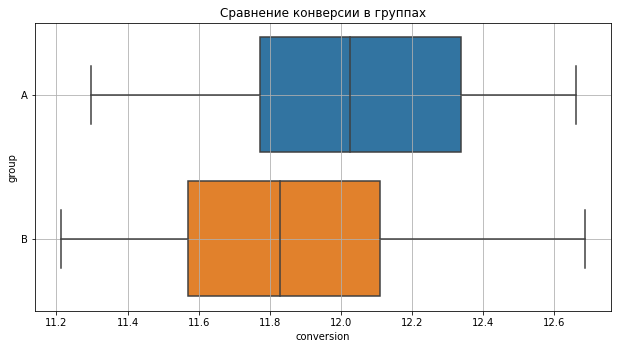

In [7]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=daily_data, x='conversion', y='group', ax=ax) 
# задаём подпись к графику
ax.set_title('Сравнение конверсии в группах')
# задаём отображение сетки
ax.grid();

In [8]:
sample_a = pd.read_csv('data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.csv')


In [9]:
sample_a['date'] = pd.to_datetime(sample_a['date'])
sample_b['date'] = pd.to_datetime(sample_b['date'])

dayly_a = sample_a.groupby(sample_a['date']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
    })

dayly_b = sample_b.groupby(sample_b['date']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
    })




In [10]:
dayly_a['cum_users'] = dayly_a['cid'].cumsum()
dayly_a['cum_transactions'] = dayly_a['transactions'].cumsum()
dayly_a['cum_revenue'] = dayly_a['revenue'].cumsum()

dayly_b['cum_users'] = dayly_b['cid'].cumsum()
dayly_b['cum_transactions'] = dayly_b['transactions'].cumsum()
dayly_b['cum_revenue'] = dayly_b['revenue'].cumsum()
dayly_b

,cid,transactions,revenue,cum_users,cum_transactions,cum_revenue
date,,,,,,
2020-11-06,2499,19,996645,2499,19,996645
2020-11-07,2804,19,555499,5303,38,1552144
2020-11-08,3291,24,3044842,8594,62,4596986
2020-11-09,3062,25,1285836,11656,87,5882822
2020-11-10,3072,30,2414726,14728,117,8297548
2020-11-11,3208,22,3555727,17936,139,11853275
2020-11-12,3494,25,915653,21430,164,12768928
2020-11-13,3606,37,1703475,25036,201,14472403
2020-11-14,3276,34,2369998,28312,235,16842401


In [11]:
dayly_a['cum_conversion'] = dayly_a['cum_transactions'] * 100 / dayly_a['cum_users']
dayly_b['cum_conversion'] = dayly_b['cum_transactions'] * 100 / dayly_b['cum_users']
display(dayly_a['cum_conversion'].mean(), dayly_b['cum_conversion'].mean())

0.7127554606160045

0.7621783890588011

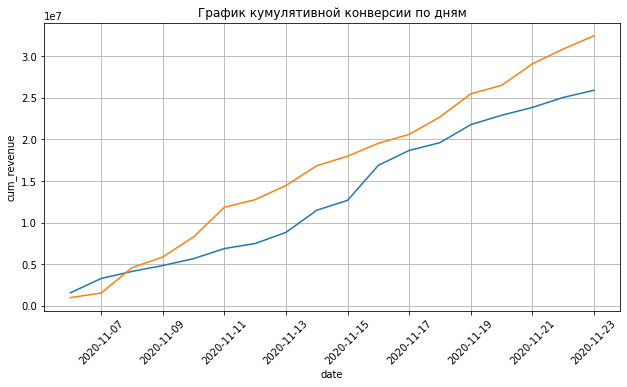

In [12]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_revenue', data=dayly_a, ax=ax)
sns.lineplot(x='date', y='cum_revenue', data=dayly_b, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True)

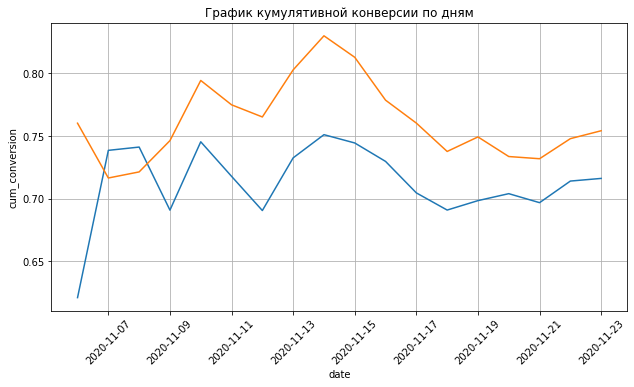

In [13]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=dayly_a, ax=ax)
sns.lineplot(x='date', y='cum_conversion', data=dayly_b, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True)

In [14]:
from statsmodels.stats.proportion import proportions_ztest

data = [['A', dayly_a['cid'].sum(), dayly_a['transactions'].sum()], 
        ['A', dayly_a['cid'].sum(), dayly_a['transactions'].sum()]]
sum_ab = pd.DataFrame(data=data, columns=['group', 'users', 'count'])
sum_ab

H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А меньше, чем конверсия в группе B'
alpha = 0.1 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=sum_ab['users'], #число "успехов"
    nobs=sum_ab['count'], #общее число наблюдений
    alternative='smaller',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value:  nan
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


c:\Users\Talic\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\proportion.py:866: RuntimeWarning: invalid value encountered in sqrt
  std_diff = np.sqrt(var_)


In [15]:
from scipy.stats import shapiro

H0 = 'Распределение нормальное'
H1 = 'Распределение не является нормальным'
alpha = 0.1

_, p_value_a = shapiro(dayly_a['revenue'])
_, p_value_b = shapiro(dayly_b['revenue'])

if p_value_a > alpha:
    print('Группа A:', H0)
else: print('Группа A:', H1)

if p_value_b > alpha:
    print('Группа B:', H0)
else: print('Группа B:', H1)


Группа A: Распределение не является нормальным
Группа B: Распределение нормальное


In [16]:
from scipy.stats import mannwhitneyu

H0 = 'Средние чеки равны в обоих группах'
Ha = 'Ежедневный средний чек в группе A, меньше чем в группе B'

alpha = 0.1

p_test = mannwhitneyu(dayly_a['revenue'], dayly_b['revenue'], alternative='less')

if p_test[1] > alpha:
    print(H0)
if p_test[1] < alpha:
    print(Ha)



Ежедневный средний чек в группе A, меньше чем в группе B


In [19]:
from confidence_interval import confidence_interval

print(confidence_interval(64, 12.35, 2.4, gamma=0.9))


(11.86, 12.84)
